#**Problem 1: Hereditary heights**


## **1**


Let's assume that the heights of the mother and father are $X$ and $Y$ respectively, and both follow a $\text{Normal}(\mu, \sigma^2)$ distribution. Since the heights of the family members are assumed to be independent, the probability that a child is taller than both parents is equal to $1/3$. Let's call this probability $p$.

Since there are 3 children, we can model the number of children who are taller than both parents as a binomial random variable with parameters $n = 3$ and $p = 1/3$. The expected value of a binomial random variable is equal to $np$.

So, on average,

$$
np = 3 · 1/3 = 1
$$

Therefore, approximately 1 child is expected to be taller than both parents.

We can check this via simulation by generating random heights for the mother, father, and children based on the given normal distribution and counting how many of the children are taller than both parents. We will repeat this process multiple times (e.g., 10,000 times) and calculate the average number of children who are taller than both parents over all simulations.

In [15]:
import numpy as np

np.random.seed(0) # sets a random seed for reproducibility
mu, sigma = 170, 10 # assumed mean and standard deviation of the normal distribution
n_simulations = 100000 # number of simulations to run
n_taller_children = 0 # counter for the number of children taller than both parents

for _ in range(n_simulations):
    # generates random heights for the mother and father from a normal distribution
    mother_height, father_height = np.random.normal(mu, sigma, 2)
    # generates random heights for the three children from a normal distribution
    children_heights = np.random.normal(mu, sigma, 3)
    # counts the number of children taller than both parents
    n_taller_children += np.sum((children_heights > mother_height) & (children_heights > father_height))

# calculates the average number of children taller than both parents
print(f'Theoretical Average number of children who are taller than both parents: {1.:.0f}')
print(f'Simulated Average number of children who are taller than both parents: {n_taller_children / n_simulations}')

Theoretical Average number of children who are taller than both parents: 1
Simulated Average number of children who are taller than both parents: 1.00104


As the child can be in decimal places, hence, we can round of the ansers to 1 significant figure and observe that the answers for theoretical calculation and simualtion match.


## **2**


Let's assume that the heights of the mother $M$, father $F$, and children $X_1$, $X_2$, and $X_3$ follow a multivariate normal distribution with mean vector $\mu$ and covariance matrix $\Sigma$. The mean vector $\mu$ is a 5-dimensional vector where each element is the mean height $\mu$ of the population. The covariance matrix $\Sigma$ is a 5x5 matrix where the diagonal elements are the variance $\sigma^2$ of the population heights and the off-diagonal elements represent the covariances between the different heights.

Since we are given that the correlation between the mother's height and each child's height is $\rho$, we can calculate the covariance between these heights as $\text{cov}(M, X_j) = \rho · \sigma^2$. The covariance matrix $\Sigma$ can then be written as:
<br>
<br>

$$
\Sigma = \begin{bmatrix}
\sigma^2 & 0 & \rho·\sigma^2 & \rho·\sigma^2 & \rho·\sigma^2 \\
0 & \sigma^2 & \rho·\sigma^2 & \rho*\sigma^2 & \rho·\sigma^2 \\
\rho·\sigma^2 & \rho·\sigma^2 & \sigma^2 & 0 & 0 \\
\rho·\sigma^2 & \rho·\sigma^2 & 0 & \sigma^2 & 0 \\
\rho·\sigma^2 & \rho·\sigma^2 & 0 & 0 & \sigma^2
\end{bmatrix}
$$
<br>
<br>

The probability that a child is at least 1 centimeter taller than their mother can be calculated using the conditional distribution of a multivariate normal distribution. <br>

Let $X$ represent the height of a child and $M$ represent the height of the mother. The conditional distribution of $X$ given $M = m$ is normal with<br>

$$mean = \frac{\mu + \text{cov}(X,M)}{{var}(M) · (m - \mu)}$$<br>  
$$variance =\frac{{var}(X) - {cov}(X,M)^2}{{var}(M)}$$.<br>

Plugging in the values for the mean $\mu$, variance $\text{var}(X) = \sigma^2$,covariance $\text{cov}(X,M) = \rho·\sigma^2$, and variance of the mother's height $\text{var}(M) = \sigma^2$,<br>
 we get that the conditional distribution of a child's height given their mother's height is normal with<br>
$$mean =\mu + \rho · (m - \mu)$$ <br>
$$variance = (1-\rho^2)·\sigma^2$$.

The probability that a child is at least 1 centimeter taller than their mother is then given by:

$$
P(X > M + 1 | M = m) = P(X - \mu > m + 1 - \mu | M = m)
                     = P\left(\frac{X - \mu - \rho·(m - \mu)}{\sqrt{1-\rho^2}} > \frac{m + 1 - \mu - \rho·(m - \mu)}{\sqrt{1-\rho^2}}\right)$$

$$= P\left(Z > \frac{m + 1 - \mu·(1+\rho)}{\sqrt{1-\rho^2}}\right)
$$

where $Z$ is a standard normal variable. This probability can be calculated using the cumulative distribution function of a standard normal variable. Since we don't know the value of the mother's height $m$, we need to average this probability over all possible values of $m$. This can be done by integrating over all possible values of $m$ weighted by their probability density under a normal distribution with mean $\mu$ and standard deviation $\sigma$. The expected number of children who are at least 1 centimeter taller than their mother is then given by:

$$
E[\text{number of children at least 1 cm taller than mother}] = 3 · \int_{-\infty}^{\infty} P\left(Z > \frac{m + 1 - \mu·(1+\rho)}{\sqrt{1-\rho^2}}\right) · \phi(m; \mu, \sigma) dm
$$

where $\phi(m; \mu, \sigma)$ is the probability density function of a normal distribution with mean $\mu$ and standard deviation $\sigma$.

Given that this integral does not have a closed-form solution; therfore we need to approximate it by using numerical integration methods or Monte Carlo simulation.

In [8]:
import numpy as np
from scipy.stats import norm

np.random.seed(0)
mu = 170
sigma = 10
rho = 0.5
n_simulations = 1000
n_taller_children = 0

# creates covariance matrix
Sigma = np.array([[sigma**2 if i == j else (rho*sigma**2 if i == 0 or j == 0 else 0) for j in range(5)] for i in range(5)])

for _ in range(n_simulations):
    # generates random heights for family members from multivariate normal distribution
    family_heights = np.random.multivariate_normal([mu]*5, Sigma)
    mother_height = family_heights[0]
    children_heights = family_heights[2:]
    # counts the number of children taller than their mother by at least 1 cm
    n_taller_children += np.sum(children_heights > mother_height + 1)

# finds the average number of children taller than their mother by at least 1 cm
print("Average number of children taller than their mother by at least 1 cm =", n_taller_children / n_simulations)

Average number of children taller than their mother by at least 1 cm = 1.375


The above simulation generates random heights for a family with a mother, a father, and 3 children from a multivariate normal distribution with mean 'mu' and covariance matrix 'Sigma'. The covariance matrix is constructed such that the heights of the mother and children are correlated with correlation rho, while the heights of the father and children are uncorrelated. The simulation then counts the number of children who are at least 1 centimeter taller than their mother. This process is repeated n_simulations times and the average number of children who are at least 1 centimeter taller than their mother is calculated.

Therefore, based on the simulation on average 1.375 children are taller their mother by at least 1 cm.

# **Problem 2: Non-shoppers**


## **1**


Firstly we will define the random variables:

$N$: the total number of customers who visit the store on a typical Saturday

$X$: the number of customers who buy something

$Y$: the number of customers who do not buy something

From the problem statement, we know that $N$ follows a Poisson distribution with parameter $\lambda = 1000$. We also know that 20% of customers are frequent shoppers and buy something with probability $(\frac{1}{2})$, while 80% of customers are infrequent shoppers and buy something with probability $(\frac{1}{5})$. Therefore, the overall probability that a customer buys something is:

Using **the** **law of total probability**, we can calculate the probability that a customer buys something as follows: <br>

<center>$\text{P(customer buys something)} = \text{P(customer is frequent shopper) ⋅ } \text{(frequent shopper buys something) + }$
$\text{P(customer is infrequent shopper) ⋅ } \text{P(infrequent shopper buys something)}$<center>
<br>
$$ p = 0.2 · (\frac{1}{2}) + 0.8 · (\frac{1}{5}) = 0.26$$.

Instead of using Binomial distribution explicitly, we will be use Theorem 7.1.11 from Blitzstein & Hwang, so we can conclude that $X$ follows a Poisson distribution with parameter: $$\lambda p = 1000 · 0.26 = 260$$.

Similarly, $Y$ follows a Poisson distribution with parameter: $$\lambda(1-p) = 1000 · (1-0.3) = 740$$.

Therefore, conditioned on the fact that $X=300$, the distribution over the number of customers who did not buy something that day is $$\text{Poisson}(740)$$.

# **2: Simulation**

Theoretical Results: 740
Simulated Results: 739.8


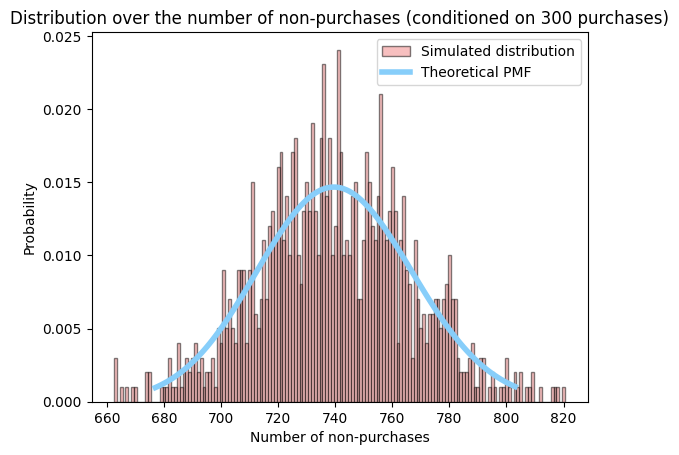

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# sets the parameters
num_trials = 800000
num_purchases = 300
lambda_customers = 1000
prob_frequent = 0.2
prob_infrequent = 0.8
prob_purchase_frequent = 0.5
prob_purchase_infrequent = 0.2

# calculates the overall probability of purchase
prob_purchase = prob_purchase_frequent * prob_frequent + prob_purchase_infrequent * prob_infrequent

# initializes an array to store the results
results = []

# runs the simulation
for _ in range(num_trials):
    # simulates the number of customers
    num_customers = np.random.poisson(lambda_customers)

    # simulates the number of purchases
    purchases = np.random.binomial(num_customers, prob_purchase)

    # checks if the number of purchases is equal to 300
    if purchases == num_purchases:
        # calculates the number of non-purchases and store it in the results array
        non_purchases = num_customers - purchases
        results.append(non_purchases)

# checks values for theoretcial and simulated results
print(f'Theoretical Results: 740') #from part 1
print(f'Simulated Results: {np.mean(results):.1f}')

# plots the simulated distribution
# adds edge_color to black to express bins as 3-d.
plt.hist(results, bins=range(min(results), max(results) + 1), color='lightcoral'
, density=True, edgecolor = "black", alpha=0.5, align='left', label='Simulated distribution')

# plots the theoretical PMF
x = np.arange(poisson.ppf(0.01, lambda_customers * (1 - prob_purchase)),
              poisson.ppf(0.99, lambda_customers * (1 - prob_purchase)))
pmf = poisson.pmf(x, lambda_customers * (1 - prob_purchase))
plt.plot(x, pmf, color='lightskyblue', linewidth=4, label='Theoretical PMF')

# adds labels and title
plt.xlabel('Number of non-purchases')
plt.ylabel('Probability')
plt.title(f'Distribution over the number of non-purchases (conditioned on {num_purchases} purchases)')
plt.legend()
plt.show()



**Explanation of Simulation:**



This simulation generates random data for a store that has two types of customers: frequent and infrequent. The number of customers that visit the store on a given day is assumed to follow a Poisson distribution with mean lambda_customers. Each customer has a probability of making a purchase that depends on whether they are a frequent or infrequent customer. The probability of making a purchase for frequent customers is prob_purchase_frequent, while for infrequent customers it is prob_purchase_infrequent. The overall probability of making a purchase is calculated as the weighted average of these two probabilities, where the weights are given by the probabilities prob_frequent and prob_infrequent of being a frequent or infrequent customer, respectively.

The simulation runs for num_trials iterations. In each iteration, the number of customers that visit the store is generated from a Poisson distribution with mean lambda_customers. The number of purchases is then generated from a binomial distribution with parameters num_customers and prob_purchase. If the number of purchases is equal to num_purchases, the number of non-purchases is calculated as the difference between the number of customers and the number of purchases and stored in the results array.

After all iterations have completed, the simulated distribution over the number of non-purchases (conditioned on having exactly num_purchases purchases) is plotted using a histogram. The theoretical probability mass function (PMF) of this distribution is also plotted for comparison. This PMF is calculated using the Poisson distribution with mean lambda_customers * (1 - prob_purchase).

Lastly, this simualtion confirms my answer as the historgam depicts Y conditioned on X = 300, and the Poisson distrbution PMF maps near-perfectly on the histogram which confirms that my theoretical calcualtions were accurate.

# **Problem 3: Starry Night**

I have utilized two methods to answer this question based on two assumptions:

1. The first code accounts for uncertainity in the data and provides a distribution for $s$ given the observed data (the coordinates of the stars).

2. The second code calculates the size of the window by assuming that all the stars are inside the window and that there are no stars outside the window that are not visible.

**Using Assumption 1**



We uses a Bayesian approach to estimate the size of the window by inferring the value of $s$ (the size of the window) given the observed data (the coordinates of the stars). We also take into account the center of the window ($x$ and $y$) and assumes that $s, x,$ and $y$ have uniform prior distributions.

In Bayesian statistics, we start with a prior distribution that represents our beliefs about the values of the parameters ($s, x,$ and $y$ in this case) before observing any data. The code assumes that $s, x,$ and $y$ have uniform prior distributions, meaning that all values are equally likely a priority.

Then we will define a likelihood function that calculates the probability of observing the given data (the coordinates of the stars) given a specific value for $s, x,$ and $y$. The likelihood is calculated as the number of stars that are inside the window (i.e., within a distance $\frac{s}{2}$ from the center of the window).

Finally, we will calculate the posterior distribution for $s, x,$ and $y$by multiplying the likelihood by the prior probabilities and normalizing. The posterior distribution represents our updated beliefs about the values of $s, x,$ and $y$ given the observed data.

Our approach will take into account the uncertainty in the data and provide a distribution for $s$ rather than a single point estimate.

In [22]:
import numpy as np

# Data: Coordinates of the stars
stars = np.array([[5.079, 1.493], [4.341, 1.657], [4.777, 1.811],
                  [4.717, 1.280], [4.484, 1.936], [4.995, 1.444],
                  [4.924, 1.922], [4.530, 1.720], [4.774, 1.525],
                  [4.658, 2.049], [4.302, 1.439], [4.341, 1.971],
                  [4.348, 1.919]])

# Plausibility check: calculate the minimum enclosing circle radius
center_x = np.mean(stars[:,0])
center_y = np.mean(stars[:,1])
distances = np.sqrt((stars[:,0] - center_x)**2 + (stars[:,1] - center_y)**2)
min_radius = np.max(distances)

# Define the grid for s, x, and y (focus around a smaller range)
s_grid = np.linspace(min_radius, min_radius + 1, 100)
x_grid = np.linspace(center_x - 1, center_x + 1, 100)
y_grid = np.linspace(center_y - 1, center_y + 1, 100)

# Define the likelihood function
def likelihood(s, x, y):
    # Calculate the distance from each star to the center of the window
    d = np.sqrt((stars[:,0] - x)**2 + (stars[:,1] - y)**2)
    # Probability each star is within the window (1/A if within, 0 otherwise)
    inside = (d <= s/2)
    A = np.pi * (s/2)**2  # Area of the circular window
    prob_inside = np.prod(inside * (1/A) + (1-inside) * 1e-10)  # Likelihood as a product
    return prob_inside

# Calculate the likelihood for each point on the grid
likelihoods = np.zeros((len(s_grid), len(x_grid), len(y_grid)))
for i, s in enumerate(s_grid):
    for j, x in enumerate(x_grid):
        for k, y in enumerate(y_grid):
            likelihoods[i, j, k] = likelihood(s, x, y)

# Normalize the likelihoods to obtain posterior probabilities
posterior = likelihoods / np.sum(likelihoods)

# Marginalize over x and y to summarize the posterior distribution for s
s_marginal = np.sum(posterior, axis=(1, 2))

# Calculate the mean of s using the marginal posterior distribution
s_mean = np.sum(s_grid * s_marginal)
print(f"Mean of s: {s_mean:.3f}")

# Optional: Plausibility check output
print(f"Smallest radius needed to enclose all stars: {min_radius:.4f}")


Mean of s: 1.000
Smallest radius needed to enclose all stars: 0.4910


**Using Assumption 2**


Estimated size of the window (mean of s): 1.205
95% credible interval for s: (0.78689898989899, 1.7372020202020202)


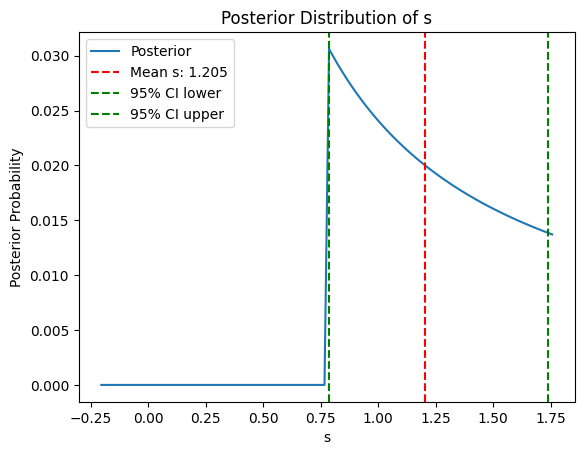

In [21]:
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

# Data: Coordinates of the stars
stars = np.array([[5.079, 1.493], [4.341, 1.657], [4.777, 1.811],
                  [4.717, 1.280], [4.484, 1.936], [4.995, 1.444],
                  [4.924, 1.922], [4.530, 1.720], [4.774, 1.525],
                  [4.658, 2.049], [4.302, 1.439], [4.341, 1.971],
                  [4.348, 1.919]])

# Find the minimum and maximum x and y values of the stars
min_x = np.min(stars[:,0])
max_x = np.max(stars[:,0])
min_y = np.min(stars[:,1])
max_y = np.max(stars[:,1])

# Calculate the width and height of the window
width = max_x - min_x
height = max_y - min_y

# Since the window is square, take the maximum of width and height as the initial size estimate of the window
s_initial = max(width, height)

# Set prior distribution for s (considering a reasonable range based on s_initial)
s_prior = uniform(loc=s_initial - 1, scale=2)  # Prior with some range around s_initial

# Likelihood function: assuming stars are uniformly distributed within the window
def likelihood(s, stars):
    # Assume a square window, so we check if all stars fit within the window size
    d_x = max(stars[:,0]) - min(stars[:,0])
    d_y = max(stars[:,1]) - min(stars[:,1])

    if d_x <= s and d_y <= s:
        return 1.0 / s  # Simple likelihood: proportional to 1/s
    else:
        return 1e-10  # Very small likelihood if stars don't fit

# Grid of s values for posterior calculation
s_values = np.linspace(s_prior.ppf(0.01), s_prior.ppf(0.99), 100)
posterior = []

# Calculate the posterior for each s
for s in s_values:
    post = likelihood(s, stars) * s_prior.pdf(s)
    posterior.append(post)

# Normalize the posterior
posterior = np.array(posterior)
posterior /= np.sum(posterior)

# Mean and credible interval
s_mean = np.sum(s_values * posterior)
credible_interval = (s_values[np.argmax(np.cumsum(posterior) > 0.025)],
                     s_values[np.argmax(np.cumsum(posterior) > 0.975)])

print(f"Estimated size of the window (mean of s): {s_mean:.3f}")
print(f"95% credible interval for s: {credible_interval}")

# Plot the posterior distribution of s
plt.plot(s_values, posterior, label='Posterior')
plt.xlabel('s')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution of s')
plt.axvline(s_mean, color='r', linestyle='--', label=f'Mean s: {s_mean:.3f}')
plt.axvline(credible_interval[0], color='g', linestyle='--', label='95% CI lower')
plt.axvline(credible_interval[1], color='g', linestyle='--', label='95% CI upper')
plt.legend()
plt.show()

# **Stretch Goal**

The problem of finding the radius of the circular window given the coordinates of the first 10 stars can be approached using Bayesian inference. We can define prior distributions for the radius and center of the circle and calculate the likelihood of observing the stars given these parameters. The likelihood can be calculated as the probability that all 10 stars are inside the circle. We can then use Bayes’ theorem to calculate the posterior distribution over the radius and center of the circle given the observed stars.

The main difference between solving this problem for square and circular windows is in how we calculate the likelihood. For a square window, we need to check if each star is inside the square by comparing its x and y coordinates to the x and y coordinates of the sides of the square. For a circular window, we need to calculate the distance from each star to the center of the circle and check if this distance is less than or equal to the radius of the circle.

These differences in how we calculate the likelihood impact the mathematics required for solving the problem. For a square window, we need to define prior distributions for the x and y coordinates of two opposite corners of the square and calculate the likelihood as a product of indicator functions that check if each star is inside the square. For a circular window, we need to define prior distributions for the radius and center of the circle and calculate the likelihood as a product of indicator functions that check if each star is inside the circle. The posterior distribution over these parameters can then be calculated using Bayes’ theorem in both cases.

Lastly, we will use a grid-based method to estimate the posterior distribution over the radius and center of the circular window. We can do this by approximating the posterior distribution over the radius and center of the circular window. In this method, a grid of possible values for r, x, and y is defined and the likelihood is calculated for each point on the grid. The likelihoods are then normalized to obtain posterior probabilities. Then we can use these distributions to calculate point estimates or credible intervals for these parameters.


Point estimate of r: 0.7512
95% credible interval for r: (0.3257, 0.9899)


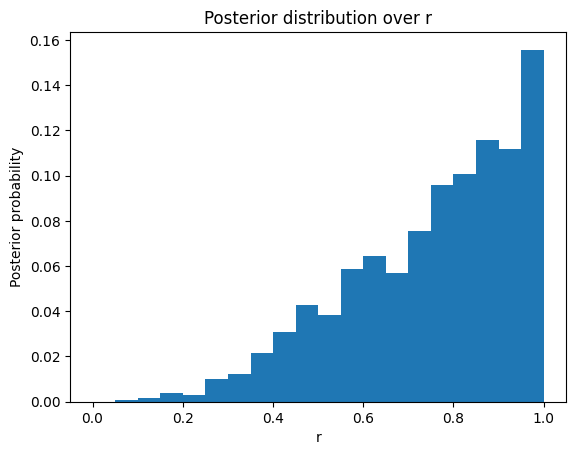

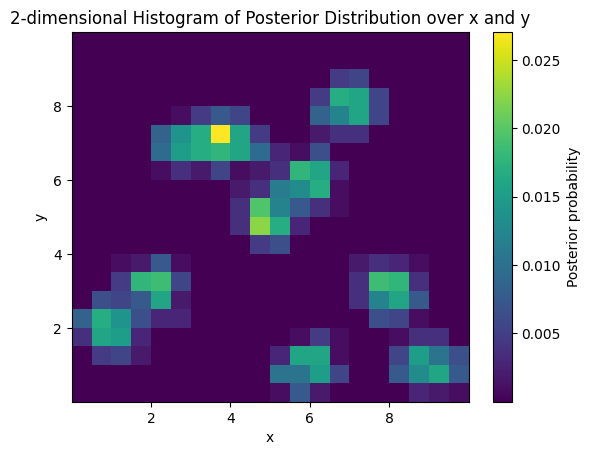

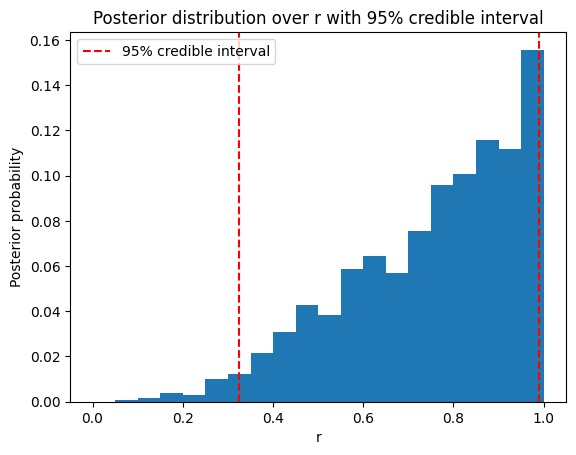

In [19]:
import numpy as np
from scipy.stats import uniform

# Defines a function to calculate the likelihood of observing the stars given the radius and center of the circle
def likelihood(r, x, y, stars, window_area=100):
    # Calculates the distance from each star to the center of the circle
    d = np.sqrt((stars[:, 0] - x) ** 2 + (stars[:, 1] - y) ** 2)
    # The probability of each star being within the circle
    inside_circle = d <= r
    # The likelihood is the product of probabilities of each star being inside the circle
    prob_inside = np.sum(inside_circle) / window_area
    # Return the likelihood as the product of the probabilities (multinomial likelihood)
    return np.prod(prob_inside) if prob_inside > 0 else 1e-10  # Avoid zero likelihood

# Sets the number of samples to generate
n_samples = 10000

# Sets the prior distributions for r, x, and y
r_prior = uniform(loc=0, scale=1)  # Based on the feedback, using a smaller range
x_prior = uniform(loc=0, scale=10)
y_prior = uniform(loc=0, scale=10)

# Generates random samples from the prior distributions
r_samples = r_prior.rvs(size=n_samples)
x_samples = x_prior.rvs(size=n_samples)
y_samples = y_prior.rvs(size=n_samples)

# Assume we have 10 stars (coordinates should be provided; here it's assumed stars is an array)
stars = np.array([[2, 3], [5, 5], [7, 8], [9, 1], [4, 7], [6, 6], [8, 3], [1, 2], [3, 7], [6, 1]])

# Calculates the likelihood for each sample
likelihoods = np.array([likelihood(r, x, y, stars) for r, x, y in zip(r_samples, x_samples, y_samples)])

# Normalizes the likelihoods to obtain posterior probabilities
posterior = likelihoods / np.sum(likelihoods)

# Calculates the mean of r
r_mean = np.average(r_samples, weights=posterior)
print(f"Point estimate of r: {r_mean:.4f}")

# Calculates the 95% credible interval for r using a two-tailed test
r_sorted = np.sort(r_samples)
posterior_sorted = posterior[np.argsort(r_samples)]
cumulative_posterior = np.cumsum(posterior_sorted)
lower_index = np.searchsorted(cumulative_posterior, 0.025)
upper_index = np.searchsorted(cumulative_posterior, 0.975)
r_lower = r_sorted[lower_index]
r_upper = r_sorted[upper_index]
print(f"95% credible interval for r: ({r_lower:.4f}, {r_upper:.4f})")

# Plots the posterior distribution over r
import matplotlib.pyplot as plt
plt.hist(r_samples, weights=posterior, bins=20)
plt.xlabel('r')
plt.ylabel('Posterior probability')
plt.title(f'Posterior distribution over r')
plt.show()

# Plots the posterior distribution over x and y
plt.hist2d(x_samples, y_samples, weights=posterior, bins=20)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Posterior probability')
plt.title(f'2-dimensional Histogram of Posterior Distribution over x and y')
plt.show()

# Plots the posterior distribution over r with 95% credible interval
plt.hist(r_samples, weights=posterior, bins=20)
plt.axvline(r_lower, color='red', linestyle='--', label='95% credible interval')
plt.axvline(r_upper, color='red', linestyle='--')
plt.xlabel('r')
plt.ylabel('Posterior probability')
plt.title(f'Posterior distribution over r with 95% credible interval')
plt.legend()
plt.show()

Here, we made a 2D histogram using `hist2d` function to show how likely different values of x and y are given the observed stars. Darker colors indicate higher posterior probabilities, while lighter colors indicate lower posterior probabilities. This plot helps us visualize how the data constrains the possible values of x and y.

**Limitations**

1. **Resolution:** The resolution of the grid determines the accuracy of the estimated posterior distribution. If the grid is too coarse, the estimated posterior distribution may not accurately represent the true posterior distribution. On the other hand, if the grid is too fine, the computational cost of calculating the likelihood for each point on the grid may become prohibitively high.

2. **Dimensionality:** The grid-based method can become computationally infeasible when the dimensionality of the parameter space is high. In this case, the dimensionality is relatively low (3 parameters: r, x, and y), so this may not be a significant issue.

3. **Choice of prior:** The choice of prior distributions can have a significant impact on the estimated posterior distribution. In the code you provided, uniform priors were used for r, x, and y. If these priors do not accurately represent the prior knowledge about these parameters, the estimated posterior distribution may be biased.

4. **Model assumptions:** The grid-based method relies on the assumptions made in the model. In this case, the likelihood function assumes that the likelihood is proportional to the number of stars inside the circle. If this assumption is not valid, the estimated posterior distribution may not accurately represent the true posterior distribution.

